In [2]:
# %run kernel_trick.py

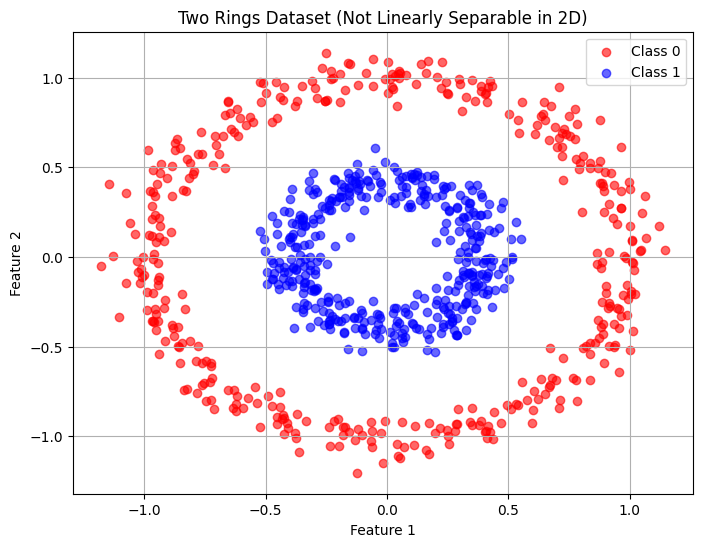

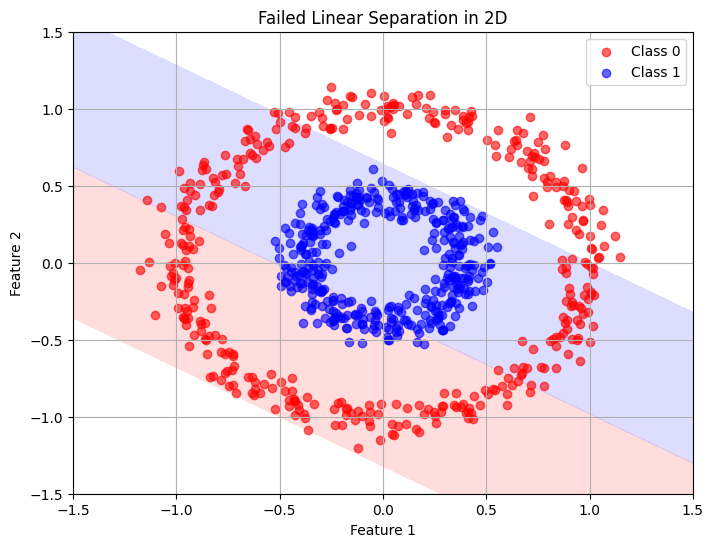

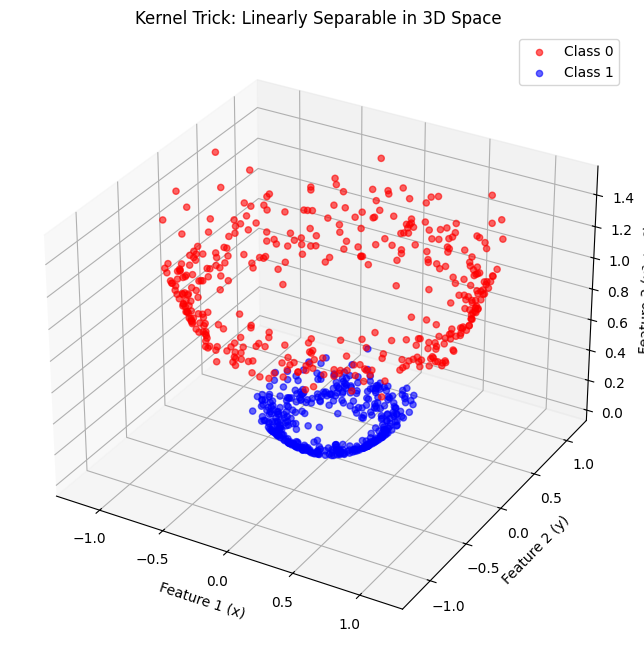

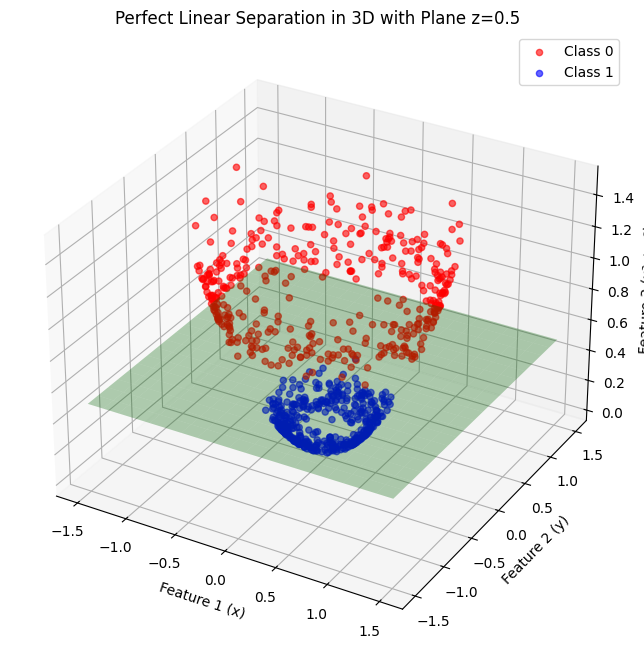

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

# 1. Generate two concentric rings
X, y = make_circles(n_samples=800, noise=0.07, factor=0.4, random_state=42)

# 2. Plot original 2D data (not linearly separable)
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0', alpha=0.6)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1', alpha=0.6)
plt.title("Two Rings Dataset (Not Linearly Separable in 2D)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

# 3. Attempt linear classification in 2D (will fail)
linear_svm = SVC(kernel='linear')
linear_svm.fit(X, y)

# Create mesh for decision boundary
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 200), np.linspace(-1.5, 1.5, 200))
Z = linear_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.4, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0', alpha=0.6)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1', alpha=0.6)
plt.title("Failed Linear Separation in 2D")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

# 4. Transform to 3D using kernel trick (polynomial/RBF implicit mapping)
def kernel_3d_transform(X):
    """Implicit 3D transformation (z = x² + y²)"""
    return np.column_stack((X[:, 0], X[:, 1], X[:, 0]**2 + X[:, 1]**2))

X_3d = kernel_3d_transform(X)

# 5. Visualize in 3D (now linearly separable)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[y == 0, 0], X_3d[y == 0, 1], X_3d[y == 0, 2], 
           color='red', label='Class 0', alpha=0.6, s=20)
ax.scatter(X_3d[y == 1, 0], X_3d[y == 1, 1], X_3d[y == 1, 2], 
           color='blue', label='Class 1', alpha=0.6, s=20)
ax.set_title("Kernel Trick: Linearly Separable in 3D Space")
ax.set_xlabel("Feature 1 (x)")
ax.set_ylabel("Feature 2 (y)")
ax.set_zlabel("Feature 3 (x² + y²)")
ax.legend()
plt.show()

# 6. Show perfect separation with plane in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(X_3d[y == 0, 0], X_3d[y == 0, 1], X_3d[y == 0, 2], 
           color='red', label='Class 0', alpha=0.6, s=20)
ax.scatter(X_3d[y == 1, 0], X_3d[y == 1, 1], X_3d[y == 1, 2], 
           color='blue', label='Class 1', alpha=0.6, s=20)

# Create separating plane (z = 0.5 is arbitrary between the two rings)
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 20), np.linspace(-1.5, 1.5, 20))
zz = np.full(xx.shape, 0.5)  # Plane at z=0.5 separates the rings

ax.plot_surface(xx, yy, zz, alpha=0.3, color='green')
ax.set_title("Perfect Linear Separation in 3D with Plane z=0.5")
ax.set_xlabel("Feature 1 (x)")
ax.set_ylabel("Feature 2 (y)")
ax.set_zlabel("Feature 3 (x² + y²)")
ax.legend()
plt.show()

In [6]:
# !pip install mlxtend

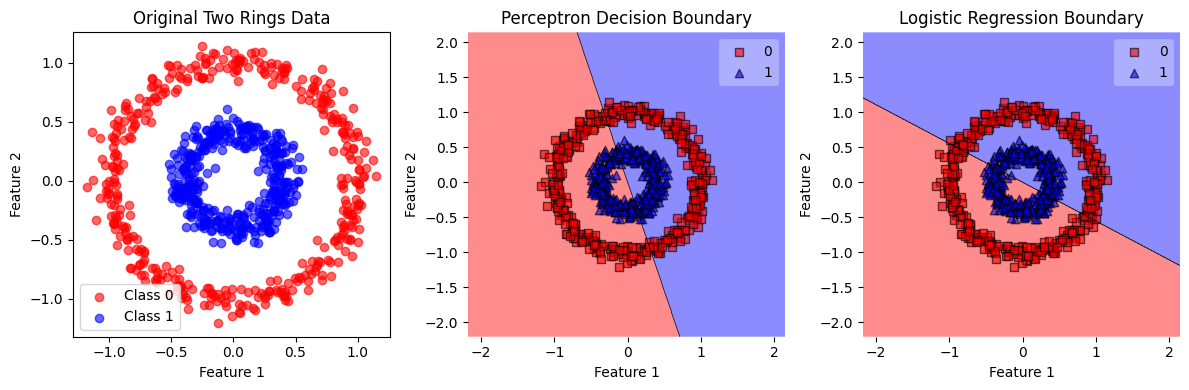

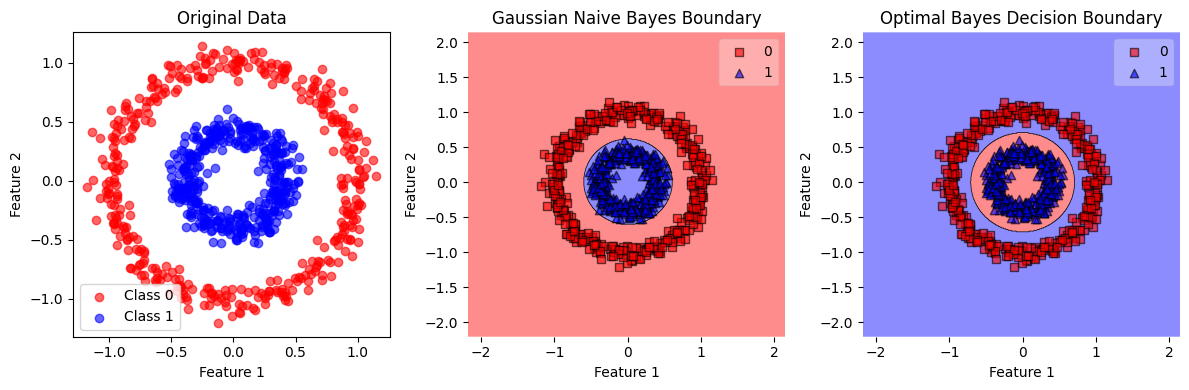

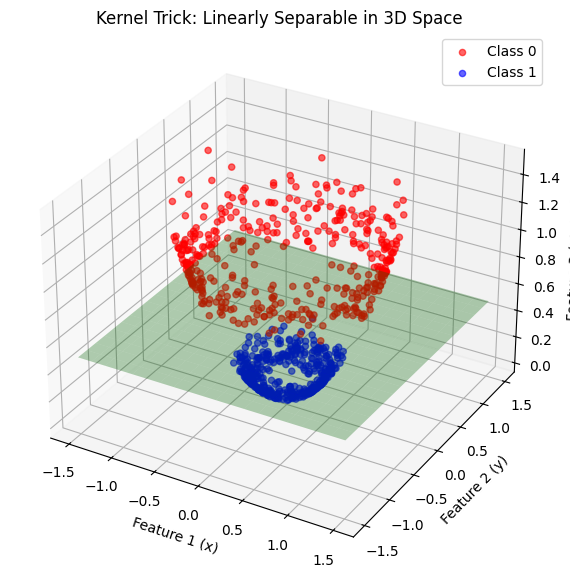

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap

# Generate two concentric rings
X, y = make_circles(n_samples=800, noise=0.07, factor=0.4, random_state=42)

# Create a mesh grid for decision boundaries
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 200), np.linspace(-1.5, 1.5, 200))

# 1. Plot original data
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.6, label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.6, label='Class 1')
plt.title("Original Two Rings Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# 2. Attempt with Perceptron (linear classifier)
perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X, y)

plt.subplot(132)
plot_decision_regions(X, y, clf=perceptron, colors='red,blue', scatter_kwargs={'alpha':0.6})
plt.title("Perceptron Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# 3. Attempt with Logistic Regression (linear classifier)
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X, y)

plt.subplot(133)
plot_decision_regions(X, y, clf=logreg, colors='red,blue', scatter_kwargs={'alpha':0.6})
plt.title("Logistic Regression Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

# 4. Optimal Bayes Classifier
# Since we know the true distribution is concentric circles, we can compute the optimal boundary
def bayes_decision_boundary(X):
    """Optimal decision boundary for concentric circles"""
    return (X[:, 0]**2 + X[:, 1]**2) > 0.5  # Midpoint between the two rings

# Create a dummy classifier to use with plot_decision_regions
class BayesClassifier:
    def predict(self, X):
        return bayes_decision_boundary(X).astype(int)

# Plot the results
plt.figure(figsize=(12, 4))

# Plot original data
plt.subplot(131)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.6, label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.6, label='Class 1')
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# Plot Gaussian Naive Bayes (approximation)
gnb = GaussianNB()
gnb.fit(X, y)

plt.subplot(132)
plot_decision_regions(X, y, clf=gnb, colors='red,blue', scatter_kwargs={'alpha':0.6})
plt.title("Gaussian Naive Bayes Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot optimal Bayes boundary
plt.subplot(133)
plot_decision_regions(X, y, clf=BayesClassifier(), colors='red,blue', scatter_kwargs={'alpha':0.6})
plt.title("Optimal Bayes Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

# 5. Show the kernel trick transformation (3D)
def kernel_transform(X):
    """Transform to 3D using kernel trick (z = x² + y²)"""
    return np.column_stack((X[:, 0], X[:, 1], X[:, 0]**2 + X[:, 1]**2))

X_3d = kernel_transform(X)

# Plot in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[y==0, 0], X_3d[y==0, 1], X_3d[y==0, 2], 
           color='red', label='Class 0', alpha=0.6, s=20)
ax.scatter(X_3d[y==1, 0], X_3d[y==1, 1], X_3d[y==1, 2], 
           color='blue', label='Class 1', alpha=0.6, s=20)

# Add optimal separating plane
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 20), np.linspace(-1.5, 1.5, 20))
zz = np.full(xx.shape, 0.5)  # Plane at z=0.5 (optimal boundary)
ax.plot_surface(xx, yy, zz, alpha=0.3, color='green')

ax.set_title("Kernel Trick: Linearly Separable in 3D Space")
ax.set_xlabel("Feature 1 (x)")
ax.set_ylabel("Feature 2 (y)")
ax.set_zlabel("Feature 3 (x² + y²)")
ax.legend()
plt.show()

تمرین اینکه با بردن داده ها از دستگاه دکارتی به دستگاه قطبی، می توان از روش بیز برای جداسازی استفاده کرد. 

In [ ]:
!pip install mpl_toolkits

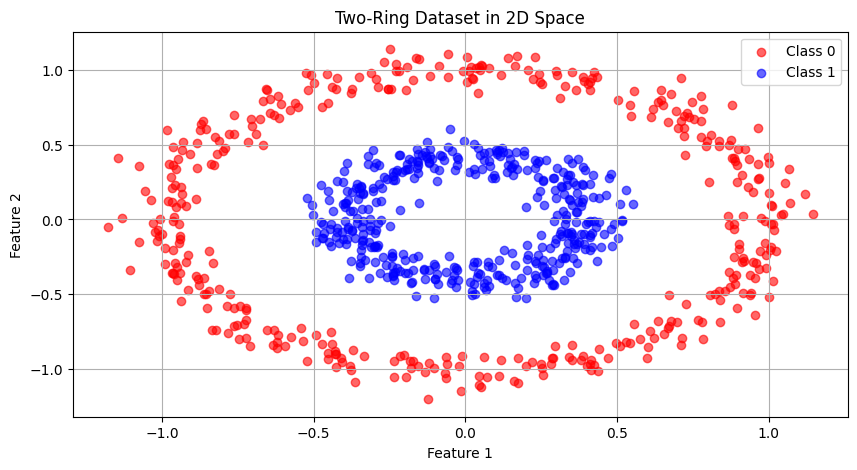

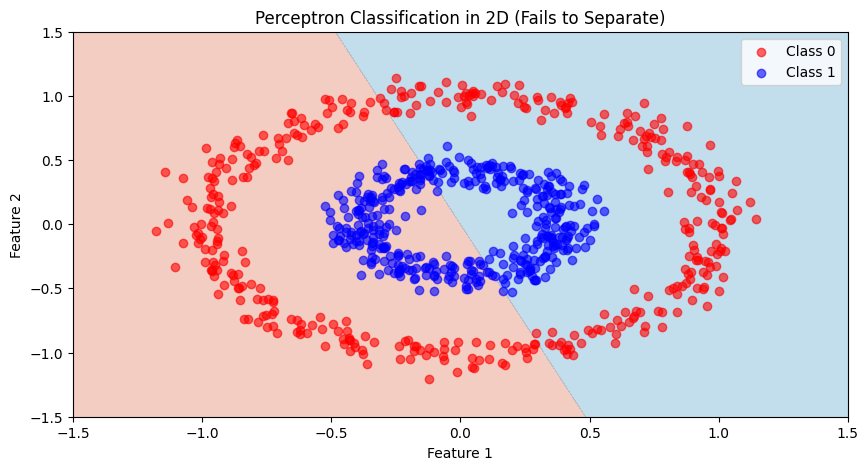

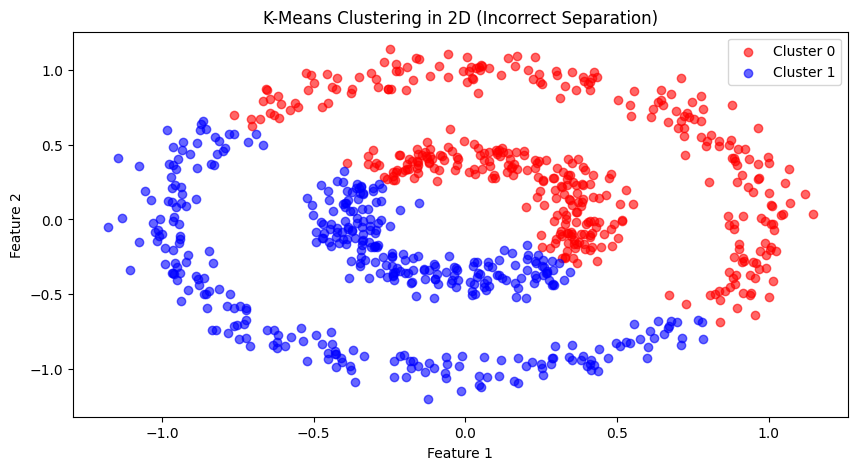

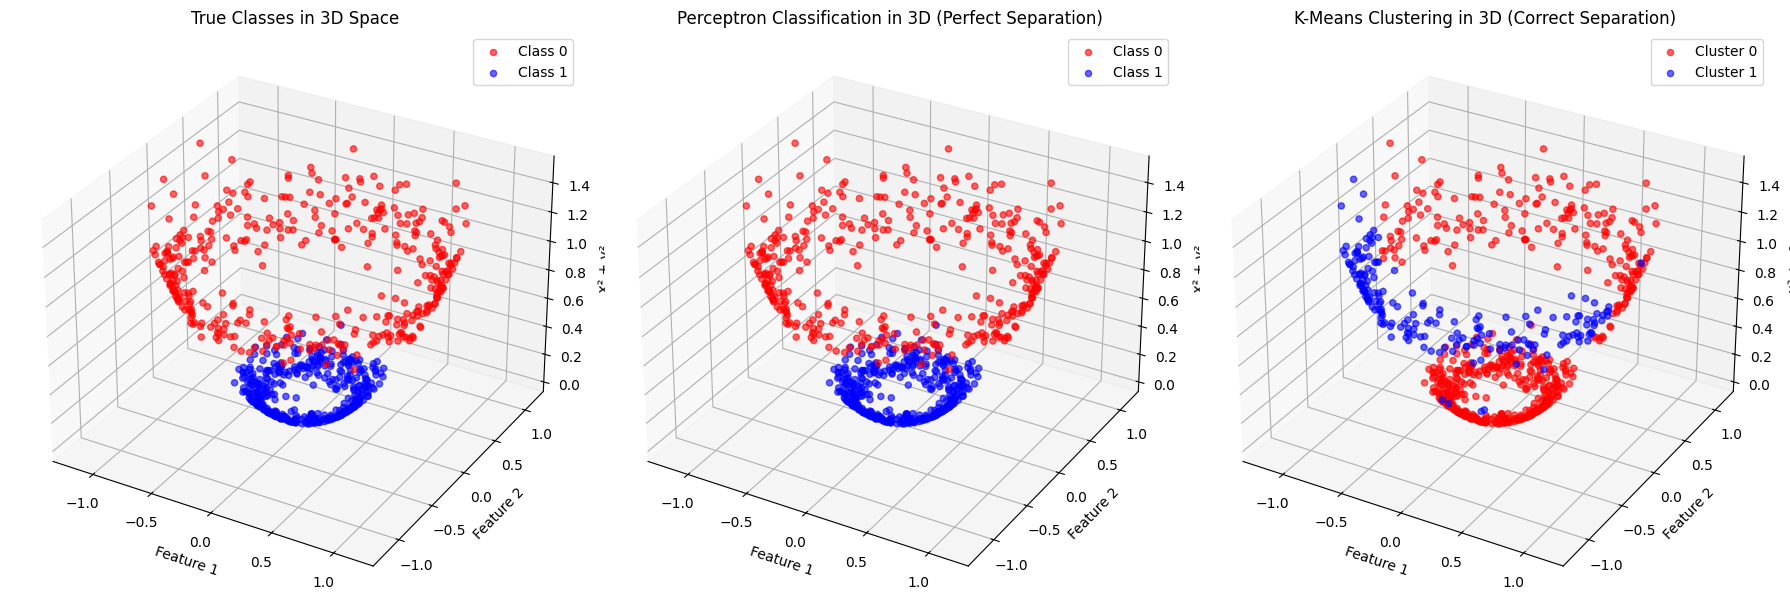

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.linear_model import Perceptron
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# 1. Generate Two-Ring Dataset
X, y = make_circles(n_samples=800, noise=0.07, factor=0.4, random_state=42)

# 2. Visualize Original 2D Data
plt.figure(figsize=(10, 5))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', alpha=0.6, label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', alpha=0.6, label='Class 1')
plt.title("Two-Ring Dataset in 2D Space")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

# 3. Apply Perceptron (Linear Classifier)
perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X, y)

# Create decision boundary grid
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 200), np.linspace(-1.5, 1.5, 200))
Z = perceptron.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 5))
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.4, cmap='RdBu')
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', alpha=0.6, label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', alpha=0.6, label='Class 1')
plt.title("Perceptron Classification in 2D (Fails to Separate)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# 4. Apply K-Means Clustering in 2D
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
cluster_labels = kmeans.labels_

plt.figure(figsize=(10, 5))
plt.scatter(X[cluster_labels == 0, 0], X[cluster_labels == 0, 1], color='red', alpha=0.6, label='Cluster 0')
plt.scatter(X[cluster_labels == 1, 0], X[cluster_labels == 1, 1], color='blue', alpha=0.6, label='Cluster 1')
plt.title("K-Means Clustering in 2D (Incorrect Separation)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# 5. Kernel Trick: Transform to 3D (z = x² + y²)
X_3d = np.column_stack((X[:, 0], X[:, 1], X[:, 0]**2 + X[:, 1]**2))

# 6. Perceptron in 3D
perceptron_3d = Perceptron(max_iter=1000, random_state=42)
perceptron_3d.fit(X_3d, y)

# 7. K-Means in 3D
kmeans_3d = KMeans(n_clusters=2, random_state=42)
kmeans_3d.fit(X_3d)
cluster_labels_3d = kmeans_3d.labels_

# 8. Visualize 3D Results
fig = plt.figure(figsize=(18, 6))

# True classes in 3D
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X_3d[y == 0, 0], X_3d[y == 0, 1], X_3d[y == 0, 2], color='red', alpha=0.6, label='Class 0')
ax1.scatter(X_3d[y == 1, 0], X_3d[y == 1, 1], X_3d[y == 1, 2], color='blue', alpha=0.6, label='Class 1')
ax1.set_title("True Classes in 3D Space")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")
ax1.set_zlabel("x² + y²")
ax1.legend()

# Perceptron results in 3D
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(X_3d[perceptron_3d.predict(X_3d) == 0, 0], 
            X_3d[perceptron_3d.predict(X_3d) == 0, 1], 
            X_3d[perceptron_3d.predict(X_3d) == 0, 2], color='red', alpha=0.6, label='Class 0')
ax2.scatter(X_3d[perceptron_3d.predict(X_3d) == 1, 0], 
            X_3d[perceptron_3d.predict(X_3d) == 1, 1], 
            X_3d[perceptron_3d.predict(X_3d) == 1, 2], color='blue', alpha=0.6, label='Class 1')
ax2.set_title("Perceptron Classification in 3D (Perfect Separation)")
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")
ax2.set_zlabel("x² + y²")
ax2.legend()

# K-Means results in 3D
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(X_3d[cluster_labels_3d == 0, 0], 
            X_3d[cluster_labels_3d == 0, 1], 
            X_3d[cluster_labels_3d == 0, 2], color='red', alpha=0.6, label='Cluster 0')
ax3.scatter(X_3d[cluster_labels_3d == 1, 0], 
            X_3d[cluster_labels_3d == 1, 1], 
            X_3d[cluster_labels_3d == 1, 2], color='blue', alpha=0.6, label='Cluster 1')
ax3.set_title("K-Means Clustering in 3D (Correct Separation)")
ax3.set_xlabel("Feature 1")
ax3.set_ylabel("Feature 2")
ax3.set_zlabel("x² + y²")
ax3.legend()

plt.tight_layout()
plt.show()